In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/gomer/oline')
print(sys.path)

['/home/gomer/miniconda3/envs/openhands/lib/python311.zip', '/home/gomer/miniconda3/envs/openhands/lib/python3.11', '/home/gomer/miniconda3/envs/openhands/lib/python3.11/lib-dynload', '', '/home/gomer/miniconda3/envs/openhands/lib/python3.11/site-packages', '/home/gomer/oline']


In [2]:
from PoseTools.data.parsers_and_processors.parsers import MetadataParser

metadata_path = '/home/gomer/oline/PoseTools/data/metadata/glosses_meta.json'
metadata = MetadataParser(metadata_path).read_metadata()
print('Total number of datapoints:', len(metadata))
metadata = metadata[metadata['Location'] != -1]
print('Number of datapoints with location:', len(metadata))
print('Number of unique locations:', len(metadata['Location'].unique()))
print('Set of unique locations:', metadata['Location'].unique())
metadata

Total number of datapoints: 6892
Number of datapoints with location: 5738
Number of unique locations: 104
Set of unique locations: ['Neutral space' 'Weak hand: palm' 'Chest' 'Head' 'R-loc'
 'Horizontal plane' 'Variable' 'Arm' 'Parallel plane' 'Shoulder' 'Eye'
 'Neck' 'Trunk' 'Weak hand: thumb' 'Weak hand' 'Mouth' 'Forehead'
 'Chest contra' 'Belly' 'Upper lip' 'Chin' 'Weak hand: back'
 'Weak hand: thumb side' 'R-loc > R-loc' 'Face' 'Weak hand: finger tips'
 'Virtual object' 'Chin > weak hand: thumb side' 'Chin > chest' 'Cheek'
 'Nose' 'Ear' 'Flank' 'Shoulder contra' 'Temple' 'Nose > neutral space'
 'Leg' 'Weak hand: web space' 'Hip' 'Forehead > weak hand: palm'
 'Upper arm' 'Chest > trunk' 'Back of head' 'Head > neutral space'
 'Lower arm' 'Weak hand: index finger' 'Wrist' 'Forehead > neutral space'
 'Ear > cheek' 'Weak hand: base' 'Neck > chest' 'Elbow' 'Mouth > chin'
 'Ear > chest' 'Cheek > chin' 'Forehead > chin' 'Weak hand: front'
 'Neutral space > nose' 'Eyebrow' 'Cheekbone' 'Head 

,Gloss ID,Annotation ID Gloss: Dutch,Annotation ID Gloss: English,Handedness,Strong Hand,Weak Hand,Affiliation,Location,Link
22,3835,#VINGERSPELLING,#FINGERSPELLING,1,Variable,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/3835
28,2892,0-A,0-A,1,O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2892
29,2893,0-B,0-B,1,T,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2893
30,2894,0-C,0-C,1,Baby_O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2894
31,2895,"1,5-A","1,5-A",1,1,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2895
...,...,...,...,...,...,...,...,...,...
6882,49272,ZAAMZORG,ZAAMZORG,2s,B,B,[UvA],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/4...
6886,49305,VOUWWAGEN,FOLDING-CAMPER,2s,B,B,[UvA],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/4...
6887,49306,BACKPACKEN,BACKPACKING,2s,C,C,[UvA],Chest,https://signbank.cls.ru.nl//dictionary/gloss/4...
6889,49308,VERWARD-C,CONFUSED-C,2s,1,1,[UvA],Trunk,https://signbank.cls.ru.nl//dictionary/gloss/4...


In [3]:
# Group by the 'Location' column and get the first 'Link' for each unique location
unique_location_links = metadata.groupby('Location')['Link'].first()

# Print each unique location with one example link
for location, link in unique_location_links.items():
    print(f"Location: {location}, Link: {link}")


Location: Arm, Link: https://signbank.cls.ru.nl//dictionary/gloss/3058
Location: Armpit, Link: https://signbank.cls.ru.nl//dictionary/gloss/4514
Location: Back, Link: https://signbank.cls.ru.nl//dictionary/gloss/2880
Location: Back of head, Link: https://signbank.cls.ru.nl//dictionary/gloss/2741
Location: Belly, Link: https://signbank.cls.ru.nl//dictionary/gloss/813
Location: Belly + forehead, Link: https://signbank.cls.ru.nl//dictionary/gloss/38
Location: Belly > chest, Link: https://signbank.cls.ru.nl//dictionary/gloss/4483
Location: Belly contra, Link: https://signbank.cls.ru.nl//dictionary/gloss/45996
Location: Bottom/crotch, Link: https://signbank.cls.ru.nl//dictionary/gloss/47473
Location: Breasts, Link: https://signbank.cls.ru.nl//dictionary/gloss/48092
Location: Breasts_ipsi, Link: https://signbank.cls.ru.nl//dictionary/gloss/47528
Location: Cheek, Link: https://signbank.cls.ru.nl//dictionary/gloss/3123
Location: Cheek > chin, Link: https://signbank.cls.ru.nl//dictionary/gloss/

In [4]:
location_keys = metadata['Location'].unique()

# Separate entries with '+' or '>' into one list, and the rest into another
location_keys_with_symbols = sorted(set([loc.lower() for loc in location_keys if '+' in loc or '>' in loc]))
location_keys_without_symbols = sorted(set([loc.lower() for loc in location_keys if '+' not in loc and '>' not in loc]))

# Print the results
print("Location keys with '+' or '>':", location_keys_with_symbols)
print("Location keys without '+' or '>':", location_keys_without_symbols)



Location keys with '+' or '>': ['belly + forehead', 'belly > chest', 'cheek > chin', 'chest > trunk', 'chin > chest', 'chin > forehead', 'chin > neutral space', 'chin > weak hand: index finger', 'chin > weak hand: palm', 'chin > weak hand: thumb side', 'ear > cheek', 'ear > chest', 'eye > neutral space', 'forehead > chest', 'forehead > chin', 'forehead > neutral space', 'forehead > shoulder', 'forehead > weak hand: palm', 'head + neutral space', 'head > chest', 'head > chest > shoulder', 'head > neutral space', 'head > shoulder', 'mouth > cheek', 'mouth > chest', 'mouth > chin', 'mouth > neutral space', 'mouth > weak hand', 'neck > chest', 'neutral space > head', 'neutral space > nose', 'nose > chin', 'nose > neutral space', 'r-loc > r-loc', 'shoulder > shoulder', 'shoulder > weak hand: palm', 'weak hand > arm', 'weak hand: thumb side > arm']
Location keys without '+' or '>': ['arm', 'armpit', 'back', 'back of head', 'belly', 'belly contra', 'bottom/crotch', 'breasts', 'breasts_ipsi', 

In [5]:
import re

# Split entries in location_keys_with_symbols by '>' and '+'
split_location_keys = [part.strip() for loc in location_keys_with_symbols for part in re.split(r'[>+]', loc)]

# Print the result
print("Split location keys:", set(split_location_keys))

Split location keys: {'weak hand: index finger', 'chin', 'cheek', 'neutral space', 'weak hand: thumb side', 'r-loc', 'ear', 'eye', 'head', 'weak hand', 'neck', 'weak hand: palm', 'mouth', 'nose', 'shoulder', 'trunk', 'arm', 'forehead', 'belly', 'chest'}


In [6]:
# Convert location_keys_without_symbols to a set for faster lookup
location_keys_without_symbols_set = set(location_keys_without_symbols)

# Find keys in split_location_keys that are not in location_keys_without_symbols
unmatched_keys = {key for key in split_location_keys if key not in location_keys_without_symbols_set}

# Print the unmatched keys
print("Keys in split_location_keys that are not in location_keys_without_symbols:", unmatched_keys)


Keys in split_location_keys that are not in location_keys_without_symbols: set()


In conclusion, all combinatorics are represented by the minimal set. As such, we continue to leverage the minimal set, as we will operate on a per frame base.

In [7]:
# Subset the DataFrame to include only rows where 'Location' is in location_keys_without_symbols
locations = sorted(set([loc for loc in location_keys if '+' not in loc and '>' not in loc]))
df = metadata[metadata['Location'].isin(locations)]

# Display the filtered DataFrame
print('Number of datapoints with elementary location:', len(df))

Number of datapoints with elementary location: 5604


In [8]:
df.value_counts('Location')

Location
Neutral space          2891
Weak hand: palm         341
Head                    274
Chest                   255
Mouth                   207
                       ... 
Breasts                   1
Belly contra              1
Knee                      1
Neck contra               1
Weak hand: knuckles       1
Name: count, Length: 66, dtype: int64

Processing pose files:   0%|          | 4/5604 [00:00<02:25, 38.55it/s]

First fallback path: /home/gomer/signbank_videos/#VINGERSPELLING.pose
Second fallback path: /home/gomer/signbank_videos/#VINGERSPELLING.pose
Skipping file (no pose data): #VINGERSPELLING.pose
First fallback path: /home/gomer/signbank_videos/1,5.A.pose
Second fallback path: /home/gomer/signbank_videos/1,5.A.pose
Skipping file (no pose data): 1,5-A.pose
First fallback path: /home/gomer/signbank_videos/1.A.pose
Second fallback path: /home/gomer/signbank_videos/1.A.pose
Skipping file (no pose data): 1-A.pose
First fallback path: /home/gomer/signbank_videos/1.B.pose
Second fallback path: /home/gomer/signbank_videos/1.B.pose
Skipping file (no pose data): 1-B.pose


Processing pose files:   1%|▏         | 76/5604 [00:02<02:41, 34.17it/s]

First fallback path: /home/gomer/signbank_videos/4.ORD-A.pose
Second fallback path: /home/gomer/signbank_videos/4.ORD-A.pose
Skipping file (no pose data): 4.ORD-A.pose


Processing pose files:   3%|▎         | 185/5604 [00:06<02:33, 35.32it/s]

First fallback path: /home/gomer/signbank_videos/AFHANKELIJK-E.pose
Second fallback path: /home/gomer/signbank_videos/AFHANKELIJK-E.pose
Skipping file (no pose data): AFHANKELIJK-E.pose


Processing pose files:   3%|▎         | 195/5604 [00:06<02:14, 40.36it/s]

First fallback path: /home/gomer/signbank_videos/AFSPRAAK-E.pose
Second fallback path: /home/gomer/signbank_videos/AFSPRAAK-E.pose
Skipping file (no pose data): AFSPRAAK-E.pose


Processing pose files:   5%|▍         | 270/5604 [00:09<03:35, 24.72it/s]

First fallback path: /home/gomer/signbank_videos/AT+C_spreid.pose
Second fallback path: /home/gomer/signbank_videos/AT+C_spreid.pose
Skipping file (no pose data): AT+C_spreid.pose


Processing pose files:   5%|▌         | 294/5604 [00:10<03:02, 29.09it/s]

First fallback path: /home/gomer/signbank_videos/AVONTUUR-A.pose
Second fallback path: /home/gomer/signbank_videos/AVONTUUR-A.pose
Skipping file (no pose data): AVONTUUR-A.pose


Processing pose files:  10%|▉         | 542/5604 [00:17<01:45, 47.89it/s]

First fallback path: /home/gomer/signbank_videos/BREKEN-A.pose
Second fallback path: /home/gomer/signbank_videos/BREKEN-A.pose
Skipping file (no pose data): BREKEN-A.pose
First fallback path: /home/gomer/signbank_videos/BREKEN-B.pose
Second fallback path: /home/gomer/signbank_videos/BREKEN-B.pose
Skipping file (no pose data): BREKEN-B.pose
First fallback path: /home/gomer/signbank_videos/BREKEN-C.pose
Second fallback path: /home/gomer/signbank_videos/BREKEN-C.pose
Skipping file (no pose data): BREKEN-C.pose
First fallback path: /home/gomer/signbank_videos/BREKEN-E.pose
Second fallback path: /home/gomer/signbank_videos/BREKEN-E.pose
Skipping file (no pose data): BREKEN-E.pose


Processing pose files:  11%|█         | 630/5604 [00:19<02:27, 33.71it/s]

First fallback path: /home/gomer/signbank_videos/CONGRES-D.pose
Second fallback path: /home/gomer/signbank_videos/CONGRES-D.pose
Skipping file (no pose data): CONGRES-D.pose


Processing pose files:  12%|█▏        | 659/5604 [00:20<02:19, 35.53it/s]

First fallback path: /home/gomer/signbank_videos/DAN-C.pose
Second fallback path: /home/gomer/signbank_videos/DAN-C.pose
Skipping file (no pose data): DAN-C.pose


Processing pose files:  19%|█▊        | 1047/5604 [00:31<02:04, 36.70it/s]

First fallback path: /home/gomer/signbank_videos/GERHARD-BOUWMEESTER.pose
Second fallback path: /home/gomer/signbank_videos/GERHARD-BOUWMEESTER.pose
Skipping file (no pose data): GERHARD-BOUWMEESTER.pose


Processing pose files:  19%|█▉        | 1069/5604 [00:32<02:00, 37.68it/s]

First fallback path: /home/gomer/signbank_videos/GIF.pose
Second fallback path: /home/gomer/signbank_videos/GIF.pose
Skipping file (no pose data): GIF.pose


Processing pose files:  20%|█▉        | 1113/5604 [00:33<01:51, 40.39it/s]

First fallback path: /home/gomer/signbank_videos/GRENS.pose
Second fallback path: /home/gomer/signbank_videos/GRENS.pose
Skipping file (no pose data): GRENS.pose


Processing pose files:  20%|██        | 1145/5604 [00:34<01:54, 38.87it/s]

First fallback path: /home/gomer/signbank_videos/HAAR.pose
Second fallback path: /home/gomer/signbank_videos/HAAR.pose
Skipping file (no pose data): HAAR.pose


Processing pose files:  24%|██▍       | 1336/5604 [00:39<01:54, 37.25it/s]

First fallback path: /home/gomer/signbank_videos/INFORMEREN:1.pose
Second fallback path: /home/gomer/signbank_videos/INFORMEREN:1.pose
Skipping file (no pose data): INFORMEREN:1.pose


Processing pose files:  28%|██▊       | 1545/5604 [00:45<01:39, 40.67it/s]

First fallback path: /home/gomer/signbank_videos/KNIJPEN.pose
Second fallback path: /home/gomer/signbank_videos/KNIJPEN.pose
Skipping file (no pose data): KNIJPEN.pose


Processing pose files:  28%|██▊       | 1562/5604 [00:45<01:53, 35.67it/s]

First fallback path: /home/gomer/signbank_videos/KOMEN-A:1.pose
Second fallback path: /home/gomer/signbank_videos/KOMEN-A:1.pose
Skipping file (no pose data): KOMEN-A:1.pose


Processing pose files:  29%|██▉       | 1620/5604 [00:47<01:43, 38.33it/s]

First fallback path: /home/gomer/signbank_videos/LAAT-MAAR-A.pose
Second fallback path: /home/gomer/signbank_videos/LAAT-MAAR-A.pose
Skipping file (no pose data): LAAT-MAAR-A.pose


Processing pose files:  30%|██▉       | 1666/5604 [00:48<01:41, 38.64it/s]

First fallback path: /home/gomer/signbank_videos/LESGEVEN:1.pose
Second fallback path: /home/gomer/signbank_videos/LESGEVEN:1.pose
Skipping file (no pose data): LESGEVEN:1.pose


Processing pose files:  30%|███       | 1687/5604 [00:49<01:25, 45.91it/s]

First fallback path: /home/gomer/signbank_videos/LIEGEN.pose
Second fallback path: /home/gomer/signbank_videos/LIEGEN.pose
Skipping file (no pose data): LIEGEN.pose
First fallback path: /home/gomer/signbank_videos/LIGGEN.pose
Second fallback path: /home/gomer/signbank_videos/LIGGEN.pose
Skipping file (no pose data): LIGGEN.pose


Processing pose files:  30%|███       | 1699/5604 [00:49<01:27, 44.68it/s]

First fallback path: /home/gomer/signbank_videos/LIKKEN.pose
Second fallback path: /home/gomer/signbank_videos/LIKKEN.pose
Skipping file (no pose data): LIKKEN.pose


Processing pose files:  31%|███       | 1728/5604 [00:50<01:47, 36.21it/s]

First fallback path: /home/gomer/signbank_videos/LOTEN.pose
Second fallback path: /home/gomer/signbank_videos/LOTEN.pose
Skipping file (no pose data): LOTEN.pose


Processing pose files:  31%|███       | 1739/5604 [00:50<01:32, 41.63it/s]

First fallback path: /home/gomer/signbank_videos/LUKKEN-NIET-B.pose
Second fallback path: /home/gomer/signbank_videos/LUKKEN-NIET-B.pose
Skipping file (no pose data): LUKKEN-NIET-B.pose


Processing pose files:  32%|███▏      | 1809/5604 [00:52<01:30, 41.95it/s]

First fallback path: /home/gomer/signbank_videos/MEDICIJN-A.pose
Second fallback path: /home/gomer/signbank_videos/MEDICIJN-A.pose
Skipping file (no pose data): MEDICIJN-A.pose
First fallback path: /home/gomer/signbank_videos/MEDICIJN-B.pose
Second fallback path: /home/gomer/signbank_videos/MEDICIJN-B.pose
Skipping file (no pose data): MEDICIJN-B.pose


Processing pose files:  33%|███▎      | 1825/5604 [00:52<01:23, 45.21it/s]

First fallback path: /home/gomer/signbank_videos/MENEER-D.pose
Second fallback path: /home/gomer/signbank_videos/MENEER-D.pose
Skipping file (no pose data): MENEER-D.pose


Processing pose files:  33%|███▎      | 1835/5604 [00:52<01:29, 42.19it/s]

First fallback path: /home/gomer/signbank_videos/METAAL.pose
Second fallback path: /home/gomer/signbank_videos/METAAL.pose
Skipping file (no pose data): METAAL.pose
First fallback path: /home/gomer/signbank_videos/METSELEN-C.pose
Second fallback path: /home/gomer/signbank_videos/METSELEN-C.pose
Skipping file (no pose data): METSELEN-C.pose


Processing pose files:  34%|███▍      | 1896/5604 [00:54<01:29, 41.29it/s]

First fallback path: /home/gomer/signbank_videos/MOPPEREN-A:1.pose
Second fallback path: /home/gomer/signbank_videos/MOPPEREN-A:1.pose
Skipping file (no pose data): MOPPEREN-A:1.pose


Processing pose files:  34%|███▍      | 1931/5604 [00:55<01:36, 37.87it/s]

First fallback path: /home/gomer/signbank_videos/NACHT.pose
Second fallback path: /home/gomer/signbank_videos/NACHT.pose
Skipping file (no pose data): NACHT.pose


Processing pose files:  38%|███▊      | 2108/5604 [00:59<01:25, 40.75it/s]

First fallback path: /home/gomer/signbank_videos/OP-EN-NEER.pose
Second fallback path: /home/gomer/signbank_videos/OP-EN-NEER.pose
Skipping file (no pose data): OP-EN-NEER.pose
First fallback path: /home/gomer/signbank_videos/OP-PAPIER.pose
Second fallback path: /home/gomer/signbank_videos/OP-PAPIER.pose
Skipping file (no pose data): OP-PAPIER.pose
First fallback path: /home/gomer/signbank_videos/OPBLOEIEN-A.pose
Second fallback path: /home/gomer/signbank_videos/OPBLOEIEN-A.pose
Skipping file (no pose data): OPBLOEIEN-A.pose


Processing pose files:  38%|███▊      | 2139/5604 [01:00<01:24, 40.91it/s]

First fallback path: /home/gomer/signbank_videos/OPROER.pose
Second fallback path: /home/gomer/signbank_videos/OPROER.pose
Skipping file (no pose data): OPROER.pose


Processing pose files:  39%|███▉      | 2195/5604 [01:02<01:30, 37.82it/s]

First fallback path: /home/gomer/signbank_videos/OVERMORGEN.pose
Second fallback path: /home/gomer/signbank_videos/OVERMORGEN.pose
Skipping file (no pose data): OVERMORGEN.pose


Processing pose files:  42%|████▏     | 2372/5604 [01:06<00:51, 62.33it/s]

First fallback path: /home/gomer/signbank_videos/PRUIK.pose
Second fallback path: /home/gomer/signbank_videos/PRUIK.pose
Skipping file (no pose data): PRUIK.pose
First fallback path: /home/gomer/signbank_videos/PT:down.pose
Second fallback path: /home/gomer/signbank_videos/PT:down.pose
Skipping file (no pose data): PT:down.pose
First fallback path: /home/gomer/signbank_videos/PT-3hand:wijs-mid-ring.pose
Second fallback path: /home/gomer/signbank_videos/PT-3hand:wijs-mid-ring.pose
Skipping file (no pose data): PT-3hand:wijs-mid-ring.pose
First fallback path: /home/gomer/signbank_videos/PT-Bhand:1.pose
Second fallback path: /home/gomer/signbank_videos/PT-Bhand:1.pose
Skipping file (no pose data): PT-Bhand:1.pose
First fallback path: /home/gomer/signbank_videos/PT-1hand:1.pose
Second fallback path: /home/gomer/signbank_videos/PT-1hand:1.pose
Skipping file (no pose data): PT-1hand:1.pose
First fallback path: /home/gomer/signbank_videos/PT:mid.pose
Second fallback path: /home/gomer/signbank

Processing pose files:  42%|████▏     | 2379/5604 [01:06<00:55, 58.33it/s]

First fallback path: /home/gomer/signbank_videos/PT-Vhand:wijs-mid.pose
Second fallback path: /home/gomer/signbank_videos/PT-Vhand:wijs-mid.pose
Skipping file (no pose data): PT-Vhand:wijs-mid.pose
First fallback path: /home/gomer/signbank_videos/PUBER-B.pose
Second fallback path: /home/gomer/signbank_videos/PUBER-B.pose
Skipping file (no pose data): PUBER-B.pose


Processing pose files:  43%|████▎     | 2402/5604 [01:07<01:10, 45.12it/s]

First fallback path: /home/gomer/signbank_videos/REAGEREN:1.pose
Second fallback path: /home/gomer/signbank_videos/REAGEREN:1.pose
Skipping file (no pose data): REAGEREN:1.pose


Processing pose files:  44%|████▍     | 2467/5604 [01:09<01:15, 41.48it/s]

First fallback path: /home/gomer/signbank_videos/ROEPEN:1.pose
Second fallback path: /home/gomer/signbank_videos/ROEPEN:1.pose
Skipping file (no pose data): ROEPEN:1.pose


Processing pose files:  49%|████▊     | 2720/5604 [01:16<01:19, 36.28it/s]

First fallback path: /home/gomer/signbank_videos/STAPEL-B.pose
Second fallback path: /home/gomer/signbank_videos/STAPEL-B.pose
Skipping file (no pose data): STAPEL-B.pose


Processing pose files:  49%|████▉     | 2739/5604 [01:16<01:08, 41.54it/s]

First fallback path: /home/gomer/signbank_videos/STEPPEN-A.pose
Second fallback path: /home/gomer/signbank_videos/STEPPEN-A.pose
Skipping file (no pose data): STEPPEN-A.pose


Processing pose files:  55%|█████▌    | 3102/5604 [01:25<00:57, 43.33it/s]

First fallback path: /home/gomer/signbank_videos/VERLIEZEN-B.pose
Second fallback path: /home/gomer/signbank_videos/VERLIEZEN-B.pose
Skipping file (no pose data): VERLIEZEN-B.pose


Processing pose files:  59%|█████▉    | 3296/5604 [01:30<01:01, 37.74it/s]

First fallback path: /home/gomer/signbank_videos/WANDELEN.pose
Second fallback path: /home/gomer/signbank_videos/WANDELEN.pose
Skipping file (no pose data): WANDELEN.pose


Processing pose files:  62%|██████▏   | 3493/5604 [01:35<00:57, 36.56it/s]

First fallback path: /home/gomer/signbank_videos/ZWALKEN.pose
Second fallback path: /home/gomer/signbank_videos/ZWALKEN.pose
Skipping file (no pose data): ZWALKEN.pose


Processing pose files:  63%|██████▎   | 3556/5604 [01:37<01:00, 33.81it/s]

First fallback path: /home/gomer/signbank_videos/IN-A.pose
Second fallback path: /home/gomer/signbank_videos/IN-A.pose
Skipping file (no pose data): IN-A.pose


Processing pose files:  64%|██████▍   | 3579/5604 [01:38<01:07, 29.79it/s]

First fallback path: /home/gomer/signbank_videos/HANDEN-VOOR-GEZICHT.pose
Second fallback path: /home/gomer/signbank_videos/HANDEN-VOOR-GEZICHT.pose
Skipping file (no pose data): HANDEN-VOOR-GEZICHT.pose


Processing pose files:  65%|██████▍   | 3633/5604 [01:40<00:45, 43.24it/s]

First fallback path: /home/gomer/signbank_videos/LOPEND-VOORTBEWEGEN.pose
Second fallback path: /home/gomer/signbank_videos/LOPEND-VOORTBEWEGEN.pose
Skipping file (no pose data): LOPEND-VOORTBEWEGEN.pose
First fallback path: /home/gomer/signbank_videos/LOPEND-VOORTBEWEGEN-C.pose
Second fallback path: /home/gomer/signbank_videos/LOPEND-VOORTBEWEGEN-C.pose
Skipping file (no pose data): LOPEND-VOORTBEWEGEN-C.pose


Processing pose files:  66%|██████▌   | 3687/5604 [01:41<00:47, 40.42it/s]

First fallback path: /home/gomer/signbank_videos/FILMEN-A:1.pose
Second fallback path: /home/gomer/signbank_videos/FILMEN-A:1.pose
Skipping file (no pose data): FILMEN-A:1.pose


Processing pose files:  68%|██████▊   | 3805/5604 [01:45<00:49, 36.46it/s]

First fallback path: /home/gomer/signbank_videos/BIJNA-B.pose
Second fallback path: /home/gomer/signbank_videos/BIJNA-B.pose
Skipping file (no pose data): BIJNA-B.pose
First fallback path: /home/gomer/signbank_videos/HOORN.pose
Second fallback path: /home/gomer/signbank_videos/HOORN.pose
Skipping file (no pose data): HOORN.pose
First fallback path: /home/gomer/signbank_videos/PLAATSEN.pose
Second fallback path: /home/gomer/signbank_videos/PLAATSEN.pose
Skipping file (no pose data): PLAATSEN.pose


Processing pose files:  79%|███████▉  | 4440/5604 [02:06<00:26, 44.18it/s]

First fallback path: /home/gomer/signbank_videos/ABSTRACT.B.pose
Second fallback path: /home/gomer/signbank_videos/ABSTRACT.B.pose
Skipping file (no pose data): ABSTRACT.B.pose


Processing pose files:  80%|████████  | 4507/5604 [02:08<00:25, 43.77it/s]

First fallback path: /home/gomer/signbank_videos/IN-DE-MIN-STAAN.pose
Second fallback path: /home/gomer/signbank_videos/IN-DE-MIN-STAAN.pose
Skipping file (no pose data): IN-DE-MIN-STAAN.pose


Processing pose files:  82%|████████▏ | 4612/5604 [02:11<00:22, 44.05it/s]

First fallback path: /home/gomer/signbank_videos/BENZINE-B.pose
Second fallback path: /home/gomer/signbank_videos/BENZINE-B.pose
Skipping file (no pose data): BENZINE-B.pose
First fallback path: /home/gomer/signbank_videos/CITROEN-B.pose
Second fallback path: /home/gomer/signbank_videos/CITROEN-B.pose
Skipping file (no pose data): CITROEN-B.pose
First fallback path: /home/gomer/signbank_videos/GAS-GEVEN.pose
Second fallback path: /home/gomer/signbank_videos/GAS-GEVEN.pose
Skipping file (no pose data): GAS-GEVEN.pose
First fallback path: /home/gomer/signbank_videos/FRUNK.pose
Second fallback path: /home/gomer/signbank_videos/FRUNK.pose
Skipping file (no pose data): FRUNK.pose
First fallback path: /home/gomer/signbank_videos/JAGUAR.pose
Second fallback path: /home/gomer/signbank_videos/JAGUAR.pose
Skipping file (no pose data): JAGUAR.pose
First fallback path: /home/gomer/signbank_videos/KOPLAMPEN.pose
Second fallback path: /home/gomer/signbank_videos/KOPLAMPEN.pose
Skipping file (no pose

Processing pose files:  83%|████████▎ | 4624/5604 [02:11<00:21, 45.88it/s]

First fallback path: /home/gomer/signbank_videos/LAMBORGHINI.pose
Second fallback path: /home/gomer/signbank_videos/LAMBORGHINI.pose
Skipping file (no pose data): LAMBORGHINI.pose
First fallback path: /home/gomer/signbank_videos/PEUGEOT.pose
Second fallback path: /home/gomer/signbank_videos/PEUGEOT.pose
Skipping file (no pose data): PEUGEOT.pose


Processing pose files:  86%|████████▌ | 4805/5604 [02:16<00:18, 42.29it/s]

First fallback path: /home/gomer/signbank_videos/ACCELEREREN.pose
Second fallback path: /home/gomer/signbank_videos/ACCELEREREN.pose
Skipping file (no pose data): ACCELEREREN.pose
First fallback path: /home/gomer/signbank_videos/ACHTERLICHT-B.pose
Second fallback path: /home/gomer/signbank_videos/ACHTERLICHT-B.pose
Skipping file (no pose data): ACHTERLICHT-B.pose


Processing pose files:  87%|████████▋ | 4900/5604 [02:17<00:05, 137.39it/s]

First fallback path: /home/gomer/signbank_videos/tesla.pose
Second fallback path: /home/gomer/signbank_videos/tesla.pose
Skipping file (no pose data): tesla.pose
First fallback path: /home/gomer/signbank_videos/VOLKSWAGEN.pose
Second fallback path: /home/gomer/signbank_videos/VOLKSWAGEN.pose
Skipping file (no pose data): VOLKSWAGEN.pose
First fallback path: /home/gomer/signbank_videos/VIBE.pose
Second fallback path: /home/gomer/signbank_videos/VIBE.pose
Skipping file (no pose data): VIBE.pose
First fallback path: /home/gomer/signbank_videos/PINKSTEREN-A.pose
Second fallback path: /home/gomer/signbank_videos/PINKSTEREN-A.pose
Skipping file (no pose data): PINKSTEREN-A.pose
First fallback path: /home/gomer/signbank_videos/VISUAL-VERNACULAR.pose
Second fallback path: /home/gomer/signbank_videos/VISUAL-VERNACULAR.pose
Skipping file (no pose data): VISUAL-VERNACULAR.pose
First fallback path: /home/gomer/signbank_videos/KETI-KOTI.pose
Second fallback path: /home/gomer/signbank_videos/KETI-KO

Processing pose files:  88%|████████▊ | 4946/5604 [02:18<00:11, 59.68it/s] 

First fallback path: /home/gomer/signbank_videos/GAZA.pose
Second fallback path: /home/gomer/signbank_videos/GAZA.pose
Skipping file (no pose data): GAZA.pose
First fallback path: /home/gomer/signbank_videos/MALEDIVEN.pose
Second fallback path: /home/gomer/signbank_videos/MALEDIVEN.pose
Skipping file (no pose data): MALEDIVEN.pose
First fallback path: /home/gomer/signbank_videos/MILAAN.pose
Second fallback path: /home/gomer/signbank_videos/MILAAN.pose
Skipping file (no pose data): MILAAN.pose
First fallback path: /home/gomer/signbank_videos/FLORENCE.pose
Second fallback path: /home/gomer/signbank_videos/FLORENCE.pose
Skipping file (no pose data): FLORENCE.pose
First fallback path: /home/gomer/signbank_videos/VERONA.pose
Second fallback path: /home/gomer/signbank_videos/VERONA.pose
Skipping file (no pose data): VERONA.pose
First fallback path: /home/gomer/signbank_videos/NAPELS.pose
Second fallback path: /home/gomer/signbank_videos/NAPELS.pose
Skipping file (no pose data): NAPELS.pose
F

Processing pose files:  90%|█████████ | 5050/5604 [02:20<00:05, 110.63it/s]

First fallback path: /home/gomer/signbank_videos/AAMBEELD.pose
Second fallback path: /home/gomer/signbank_videos/AAMBEELD.pose
Skipping file (no pose data): AAMBEELD.pose
First fallback path: /home/gomer/signbank_videos/DE-HORTUS.pose
Second fallback path: /home/gomer/signbank_videos/DE-HORTUS.pose
Skipping file (no pose data): DE-HORTUS.pose
First fallback path: /home/gomer/signbank_videos/PIANO-B.pose
Second fallback path: /home/gomer/signbank_videos/PIANO-B.pose
Skipping file (no pose data): PIANO-B.pose
First fallback path: /home/gomer/signbank_videos/DIRIGEREN.pose
Second fallback path: /home/gomer/signbank_videos/DIRIGEREN.pose
Skipping file (no pose data): DIRIGEREN.pose
First fallback path: /home/gomer/signbank_videos/CRISTIANO-RONALDO.pose
Second fallback path: /home/gomer/signbank_videos/CRISTIANO-RONALDO.pose
Skipping file (no pose data): CRISTIANO-RONALDO.pose
First fallback path: /home/gomer/signbank_videos/LIONEL-MESSI.pose
Second fallback path: /home/gomer/signbank_video

Processing pose files:  91%|█████████ | 5089/5604 [02:21<00:06, 85.76it/s] 

First fallback path: /home/gomer/signbank_videos/7.ORD-C.pose
Second fallback path: /home/gomer/signbank_videos/7.ORD-C.pose
Skipping file (no pose data): 7.ORD-C.pose
First fallback path: /home/gomer/signbank_videos/8.ORD-C.pose
Second fallback path: /home/gomer/signbank_videos/8.ORD-C.pose
Skipping file (no pose data): 8.ORD-C.pose
First fallback path: /home/gomer/signbank_videos/9.ORD-C.pose
Second fallback path: /home/gomer/signbank_videos/9.ORD-C.pose
Skipping file (no pose data): 9.ORD-C.pose
First fallback path: /home/gomer/signbank_videos/SAMEN+2.B.pose
Second fallback path: /home/gomer/signbank_videos/SAMEN+2.B.pose
Skipping file (no pose data): SAMEN+2-B.pose
First fallback path: /home/gomer/signbank_videos/SAMEN+3.B.pose
Second fallback path: /home/gomer/signbank_videos/SAMEN+3.B.pose
Skipping file (no pose data): SAMEN+3-B.pose
First fallback path: /home/gomer/signbank_videos/SAMEN+4.B.pose
Second fallback path: /home/gomer/signbank_videos/SAMEN+4.B.pose
Skipping file (no p

Processing pose files:  91%|█████████ | 5099/5604 [02:21<00:06, 72.79it/s]

First fallback path: /home/gomer/signbank_videos/TERUG-B.pose
Second fallback path: /home/gomer/signbank_videos/TERUG-B.pose
Skipping file (no pose data): TERUG-B.pose
First fallback path: /home/gomer/signbank_videos/ZELDZAAM-B.pose
Second fallback path: /home/gomer/signbank_videos/ZELDZAAM-B.pose
Skipping file (no pose data): ZELDZAAM-B.pose
First fallback path: /home/gomer/signbank_videos/HADJ.pose
Second fallback path: /home/gomer/signbank_videos/HADJ.pose
Skipping file (no pose data): HADJ.pose
First fallback path: /home/gomer/signbank_videos/SAUDI-ARABIE.pose
Second fallback path: /home/gomer/signbank_videos/SAUDI-ARABIE.pose
Skipping file (no pose data): SAUDI-ARABIE.pose
First fallback path: /home/gomer/signbank_videos/TIMMEREN-B.pose
Second fallback path: /home/gomer/signbank_videos/TIMMEREN-B.pose
Skipping file (no pose data): TIMMEREN-B.pose
First fallback path: /home/gomer/signbank_videos/MAN-D.pose
Second fallback path: /home/gomer/signbank_videos/MAN-D.pose
Skipping file (

Processing pose files:  91%|█████████▏| 5120/5604 [02:21<00:06, 71.69it/s]

First fallback path: /home/gomer/signbank_videos/ROOS-A.pose
Second fallback path: /home/gomer/signbank_videos/ROOS-A.pose
Skipping file (no pose data): ROOS-A.pose
First fallback path: /home/gomer/signbank_videos/STAREN.pose
Second fallback path: /home/gomer/signbank_videos/STAREN.pose
Skipping file (no pose data): STAREN.pose
First fallback path: /home/gomer/signbank_videos/QUARANTAINE.pose
Second fallback path: /home/gomer/signbank_videos/QUARANTAINE.pose
Skipping file (no pose data): QUARANTAINE.pose


Processing pose files:  92%|█████████▏| 5152/5604 [02:22<00:04, 95.58it/s]

First fallback path: /home/gomer/signbank_videos/KNUFFEL.pose
Second fallback path: /home/gomer/signbank_videos/KNUFFEL.pose
Skipping file (no pose data): KNUFFEL.pose
First fallback path: /home/gomer/signbank_videos/PLAATS-B.pose
Second fallback path: /home/gomer/signbank_videos/PLAATS-B.pose
Skipping file (no pose data): PLAATS-B.pose
First fallback path: /home/gomer/signbank_videos/ZIRYAB.pose
Second fallback path: /home/gomer/signbank_videos/ZIRYAB.pose
Skipping file (no pose data): ZIRYAB.pose
First fallback path: /home/gomer/signbank_videos/BEURTWISSELING-A.pose
Second fallback path: /home/gomer/signbank_videos/BEURTWISSELING-A.pose
Skipping file (no pose data): BEURTWISSELING-A.pose
First fallback path: /home/gomer/signbank_videos/BEURTWISSELING-B.pose
Second fallback path: /home/gomer/signbank_videos/BEURTWISSELING-B.pose
Skipping file (no pose data): BEURTWISSELING-B.pose
First fallback path: /home/gomer/signbank_videos/SIENA.pose
Second fallback path: /home/gomer/signbank_vid

Processing pose files:  93%|█████████▎| 5198/5604 [02:22<00:02, 174.28it/s]

First fallback path: /home/gomer/signbank_videos/DRIEHOEK-B.pose
Second fallback path: /home/gomer/signbank_videos/DRIEHOEK-B.pose
Skipping file (no pose data): DRIEHOEK-B.pose
First fallback path: /home/gomer/signbank_videos/STOEP-B.pose
Second fallback path: /home/gomer/signbank_videos/STOEP-B.pose
Skipping file (no pose data): STOEP-B.pose
First fallback path: /home/gomer/signbank_videos/ONGELUK-C.pose
Second fallback path: /home/gomer/signbank_videos/ONGELUK-C.pose
Skipping file (no pose data): ONGELUK-C.pose
First fallback path: /home/gomer/signbank_videos/BROMMER-A.pose
Second fallback path: /home/gomer/signbank_videos/BROMMER-A.pose
Skipping file (no pose data): BROMMER-A.pose
First fallback path: /home/gomer/signbank_videos/STAD-D.pose
Second fallback path: /home/gomer/signbank_videos/STAD-D.pose
Skipping file (no pose data): STAD-D.pose
First fallback path: /home/gomer/signbank_videos/DRUK-C.pose
Second fallback path: /home/gomer/signbank_videos/DRUK-C.pose
Skipping file (no p

Processing pose files:  94%|█████████▎| 5247/5604 [02:22<00:02, 152.28it/s]

First fallback path: /home/gomer/signbank_videos/KWARTFINALE.pose
Second fallback path: /home/gomer/signbank_videos/KWARTFINALE.pose
Skipping file (no pose data): KWARTFINALE.pose
First fallback path: /home/gomer/signbank_videos/BIDDEN-C.pose
Second fallback path: /home/gomer/signbank_videos/BIDDEN-C.pose
Skipping file (no pose data): BIDDEN-C.pose
First fallback path: /home/gomer/signbank_videos/HEEL-VER.pose
Second fallback path: /home/gomer/signbank_videos/HEEL-VER.pose
Skipping file (no pose data): HEEL-VER.pose
First fallback path: /home/gomer/signbank_videos/NADENKEN-E.pose
Second fallback path: /home/gomer/signbank_videos/NADENKEN-E.pose
Skipping file (no pose data): NADENKEN-E.pose
First fallback path: /home/gomer/signbank_videos/KAARTEN-C.pose
Second fallback path: /home/gomer/signbank_videos/KAARTEN-C.pose
Skipping file (no pose data): KAARTEN-C.pose
First fallback path: /home/gomer/signbank_videos/WEGROTTEN.pose
Second fallback path: /home/gomer/signbank_videos/WEGROTTEN.pos

Processing pose files:  95%|█████████▍| 5318/5604 [02:23<00:04, 65.88it/s] 

First fallback path: /home/gomer/signbank_videos/PALEIS-A.pose
Second fallback path: /home/gomer/signbank_videos/PALEIS-A.pose
Skipping file (no pose data): PALEIS-A.pose


Processing pose files:  95%|█████████▌| 5331/5604 [02:24<00:04, 54.78it/s]

First fallback path: /home/gomer/signbank_videos/COMFORTABEL-A.pose
Second fallback path: /home/gomer/signbank_videos/COMFORTABEL-A.pose
Skipping file (no pose data): COMFORTABEL-A.pose


Processing pose files:  96%|█████████▌| 5365/5604 [02:25<00:05, 45.03it/s]

First fallback path: /home/gomer/signbank_videos/RIJK-F.pose
Second fallback path: /home/gomer/signbank_videos/RIJK-F.pose
Skipping file (no pose data): RIJK-F.pose
First fallback path: /home/gomer/signbank_videos/KENNIS.pose
Second fallback path: /home/gomer/signbank_videos/KENNIS.pose
Skipping file (no pose data): KENNIS.pose


Processing pose files:  96%|█████████▌| 5376/5604 [02:25<00:05, 43.77it/s]

First fallback path: /home/gomer/signbank_videos/OM-DE-DAG.pose
Second fallback path: /home/gomer/signbank_videos/OM-DE-DAG.pose
Skipping file (no pose data): OM-DE-DAG.pose


Processing pose files:  97%|█████████▋| 5424/5604 [02:26<00:04, 43.83it/s]

First fallback path: /home/gomer/signbank_videos/PLASSEN-B.pose
Second fallback path: /home/gomer/signbank_videos/PLASSEN-B.pose
Skipping file (no pose data): PLASSEN-B.pose
First fallback path: /home/gomer/signbank_videos/ALTIJD-B.pose
Second fallback path: /home/gomer/signbank_videos/ALTIJD-B.pose
Skipping file (no pose data): ALTIJD-B.pose


Processing pose files:  97%|█████████▋| 5443/5604 [02:27<00:04, 34.82it/s]

First fallback path: /home/gomer/signbank_videos/SCHILD-A.pose
Second fallback path: /home/gomer/signbank_videos/SCHILD-A.pose
Skipping file (no pose data): SCHILD-A.pose
First fallback path: /home/gomer/signbank_videos/KARATE-A.pose
Second fallback path: /home/gomer/signbank_videos/KARATE-A.pose
Skipping file (no pose data): KARATE-A.pose
First fallback path: /home/gomer/signbank_videos/KARATE-B.pose
Second fallback path: /home/gomer/signbank_videos/KARATE-B.pose
Skipping file (no pose data): KARATE-B.pose
First fallback path: /home/gomer/signbank_videos/BODYBUILDING.pose
Second fallback path: /home/gomer/signbank_videos/BODYBUILDING.pose
Skipping file (no pose data): BODYBUILDING.pose


Processing pose files:  98%|█████████▊| 5472/5604 [02:27<00:01, 75.29it/s]

First fallback path: /home/gomer/signbank_videos/VAN-VEEL-NAAR-WEINIG-A.pose
Second fallback path: /home/gomer/signbank_videos/VAN-VEEL-NAAR-WEINIG-A.pose
Skipping file (no pose data): VAN-VEEL-NAAR-WEINIG-A.pose
First fallback path: /home/gomer/signbank_videos/FERRARI.pose
Second fallback path: /home/gomer/signbank_videos/FERRARI.pose
Skipping file (no pose data): FERRARI.pose
First fallback path: /home/gomer/signbank_videos/DIEPGAAND.pose
Second fallback path: /home/gomer/signbank_videos/DIEPGAAND.pose
Skipping file (no pose data): DIEPGAAND.pose
First fallback path: /home/gomer/signbank_videos/OPSTUREN-E:1.pose
Second fallback path: /home/gomer/signbank_videos/OPSTUREN-E:1.pose
Skipping file (no pose data): OPSTUREN-E:1.pose
First fallback path: /home/gomer/signbank_videos/LA-TRIADA.pose
Second fallback path: /home/gomer/signbank_videos/LA-TRIADA.pose
Skipping file (no pose data): LA-TRIADA.pose
First fallback path: /home/gomer/signbank_videos/HEBBEN-E.pose
Second fallback path: /ho

Processing pose files:  98%|█████████▊| 5506/5604 [02:28<00:02, 46.41it/s]

First fallback path: /home/gomer/signbank_videos/ROT-OP.pose
Second fallback path: /home/gomer/signbank_videos/ROT-OP.pose
Skipping file (no pose data): ROT-OP.pose
First fallback path: /home/gomer/signbank_videos/DEUR-C.pose
Second fallback path: /home/gomer/signbank_videos/DEUR-C.pose
Skipping file (no pose data): DEUR-C.pose
First fallback path: /home/gomer/signbank_videos/OPEN-E.pose
Second fallback path: /home/gomer/signbank_videos/OPEN-E.pose
Skipping file (no pose data): OPEN-E.pose


Processing pose files:  99%|█████████▊| 5528/5604 [02:29<00:01, 38.58it/s]

First fallback path: /home/gomer/signbank_videos/ZO-C.pose
Second fallback path: /home/gomer/signbank_videos/ZO-C.pose
Skipping file (no pose data): ZO-C.pose
First fallback path: /home/gomer/signbank_videos/NIKS-C.pose
Second fallback path: /home/gomer/signbank_videos/NIKS-C.pose
Skipping file (no pose data): NIKS-C.pose
First fallback path: /home/gomer/signbank_videos/TRUFFEL.pose
Second fallback path: /home/gomer/signbank_videos/TRUFFEL.pose
Skipping file (no pose data): TRUFFEL.pose
First fallback path: /home/gomer/signbank_videos/BAHA.pose
Second fallback path: /home/gomer/signbank_videos/BAHA.pose
Skipping file (no pose data): BAHA.pose


Processing pose files:  99%|█████████▉| 5566/5604 [02:30<00:00, 55.23it/s]

First fallback path: /home/gomer/signbank_videos/LENS-B.pose
Second fallback path: /home/gomer/signbank_videos/LENS-B.pose
Skipping file (no pose data): LENS-B.pose
First fallback path: /home/gomer/signbank_videos/VERZAMELEN-E.pose
Second fallback path: /home/gomer/signbank_videos/VERZAMELEN-E.pose
Skipping file (no pose data): VERZAMELEN-E.pose
First fallback path: /home/gomer/signbank_videos/HAND-OP-TAFEL.pose
Second fallback path: /home/gomer/signbank_videos/HAND-OP-TAFEL.pose
Skipping file (no pose data): HAND-OP-TAFEL.pose
First fallback path: /home/gomer/signbank_videos/FLAUW-B.pose
Second fallback path: /home/gomer/signbank_videos/FLAUW-B.pose
Skipping file (no pose data): FLAUW-B.pose
First fallback path: /home/gomer/signbank_videos/HEK-D.pose
Second fallback path: /home/gomer/signbank_videos/HEK-D.pose
Skipping file (no pose data): HEK-D.pose
First fallback path: /home/gomer/signbank_videos/HEK-E.pose
Second fallback path: /home/gomer/signbank_videos/HEK-E.pose
Skipping file (

Processing pose files:  99%|█████████▉| 5572/5604 [02:30<00:00, 52.23it/s]

First fallback path: /home/gomer/signbank_videos/NADOEN.pose
Second fallback path: /home/gomer/signbank_videos/NADOEN.pose
Skipping file (no pose data): NADOEN.pose


Processing pose files: 100%|██████████| 5604/5604 [02:30<00:00, 37.18it/s]


First fallback path: /home/gomer/signbank_videos/ISLAM.pose
Second fallback path: /home/gomer/signbank_videos/ISLAM.pose
Skipping file (no pose data): ISLAM.pose
First fallback path: /home/gomer/signbank_videos/ZUIDLAREN-A.pose
Second fallback path: /home/gomer/signbank_videos/ZUIDLAREN-A.pose
Skipping file (no pose data): ZUIDLAREN-A.pose
First fallback path: /home/gomer/signbank_videos/ZUIDLAREN-B.pose
Second fallback path: /home/gomer/signbank_videos/ZUIDLAREN-B.pose
Skipping file (no pose data): ZUIDLAREN-B.pose
First fallback path: /home/gomer/signbank_videos/REAGEREN-C.pose
Second fallback path: /home/gomer/signbank_videos/REAGEREN-C.pose
Skipping file (no pose data): REAGEREN-C.pose
First fallback path: /home/gomer/signbank_videos/RIO-DE-JANEIRO.pose
Second fallback path: /home/gomer/signbank_videos/RIO-DE-JANEIRO.pose
Skipping file (no pose data): RIO-DE-JANEIRO.pose
First fallback path: /home/gomer/signbank_videos/LISSABON.pose
Second fallback path: /home/gomer/signbank_videos

TypeError: 'NoneType' object is not subscriptable

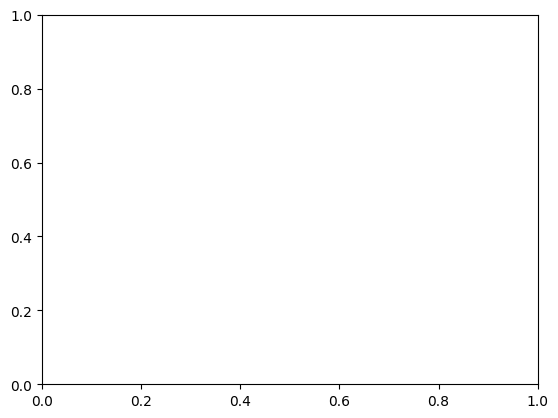

In [9]:
from PoseTools.src.modules.location.location_eval import main

pose_directory = '/home/gomer/signbank_videos'

stats, pose = main(df, pose_directory)

from PoseTools.src.modules.location.utils.plot import plot_frame_with_edges

plot_frame_with_edges(pose, frame_idx= 0)

In [ ]:
stats

,right_x_mean,right_x_std,right_y_mean,right_y_std,left_x_mean,left_x_std,left_y_mean,left_y_std,Annotation ID Gloss: Dutch
0,-0.711762,0.039665,-0.466552,0.099207,0.433205,0.018279,-2.070153,0.021901,0-A
1,-0.514726,0.002983,-0.397776,0.006913,0.753802,0.001764,-2.276610,0.008169,0-B
2,-0.520776,0.001829,-0.374489,0.008343,0.758105,0.004172,-2.297448,0.010340,0-C
3,-0.525643,0.068859,-1.060745,0.118141,0.208061,0.024931,-1.781302,0.008820,1.ORD-A
4,-0.582035,0.080238,-0.838003,0.141272,0.668990,0.097684,-0.842849,0.095218,10-A
...,...,...,...,...,...,...,...,...,...
5201,-0.486151,0.133640,-0.936318,0.327504,0.466121,0.103331,-0.943026,0.303632,KERK-B
5202,-0.585152,0.388858,-1.056668,0.192560,0.632027,0.345682,-1.257786,0.170849,UIT-DE-KAST
5203,-0.487761,0.126319,-0.601655,0.147467,0.550705,0.115608,-0.524067,0.127954,VOUWWAGEN
5204,-0.702226,0.035695,-0.821118,0.044524,0.670483,0.047125,-0.800038,0.052414,BACKPACKEN


In [ ]:
df

,Gloss ID,Annotation ID Gloss: Dutch,Annotation ID Gloss: English,Handedness,Strong Hand,Weak Hand,Affiliation,Location,Link
22,3835,#VINGERSPELLING,#FINGERSPELLING,1,Variable,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/3835
28,2892,0-A,0-A,1,O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2892
29,2893,0-B,0-B,1,T,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2893
30,2894,0-C,0-C,1,Baby_O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2894
31,2895,"1,5-A","1,5-A",1,1,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2895
...,...,...,...,...,...,...,...,...,...
6882,49272,ZAAMZORG,ZAAMZORG,2s,B,B,[UvA],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/4...
6886,49305,VOUWWAGEN,FOLDING-CAMPER,2s,B,B,[UvA],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/4...
6887,49306,BACKPACKEN,BACKPACKING,2s,C,C,[UvA],Chest,https://signbank.cls.ru.nl//dictionary/gloss/4...
6889,49308,VERWARD-C,CONFUSED-C,2s,1,1,[UvA],Trunk,https://signbank.cls.ru.nl//dictionary/gloss/4...


In [124]:
import pandas as pd
merged_df = pd.merge(df, stats, on='Annotation ID Gloss: Dutch', how='inner')
#labels = ['Arm', 'Belly', 'Nose']
#merged_df = merged_df[merged_df['Location'].isin(labels)]
merged_df = merged_df[merged_df['Handedness'] == '1']
merged_df

,Gloss ID,Annotation ID Gloss: Dutch,Annotation ID Gloss: English,Handedness,Strong Hand,Weak Hand,Affiliation,Location,Link,right_x_mean,right_x_std,right_y_mean,right_y_std,left_x_mean,left_x_std,left_y_mean,left_y_std
0,2892,0-A,0-A,1,O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2892,-0.711762,0.039665,-0.466552,0.099207,0.433205,0.018279,-2.070153,0.021901
1,2893,0-B,0-B,1,T,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2893,-0.514726,0.002983,-0.397776,0.006913,0.753802,0.001764,-2.276610,0.008169
2,2894,0-C,0-C,1,Baby_O,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2894,-0.520776,0.001829,-0.374489,0.008343,0.758105,0.004172,-2.297448,0.010340
3,2415,1.ORD-A,1.ORD-A,1,1,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/2415,-0.525643,0.068859,-1.060745,0.118141,0.208061,0.024931,-1.781302,0.008820
6,1934,100-A,100-A,1,Beak_open,-1,[Radboud],Neutral space,https://signbank.cls.ru.nl//dictionary/gloss/1934,-0.561326,0.357514,-0.834181,0.116221,0.473395,0.020020,-2.056386,0.023739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,49251,INDIAAN-C,INDIAN-C,1,V,-1,[UvA],Head,https://signbank.cls.ru.nl//dictionary/gloss/4...,-0.631213,0.150567,-0.408743,0.731066,0.428074,0.030035,-1.975449,0.049350
5197,49253,JARIG-C,BIRTHDAY-C,1,5,S,[UvA],Arm,https://signbank.cls.ru.nl//dictionary/gloss/4...,0.184477,0.199172,-1.232277,0.229954,-0.073156,0.237780,-1.696298,0.127752
5199,49255,KAMMEN-C,COMB-C,1,4,-1,[UvA],Head,https://signbank.cls.ru.nl//dictionary/gloss/4...,-0.869557,0.078593,-0.142015,0.252949,0.384711,0.032227,-2.015032,0.019292
5200,49256,KAPITEIN-B,CAPTAIN-B,1,Money,-1,[UvA],Neck,https://signbank.cls.ru.nl//dictionary/gloss/4...,-0.584846,0.025025,-0.640100,0.141340,0.478721,0.013880,-2.027778,0.034451


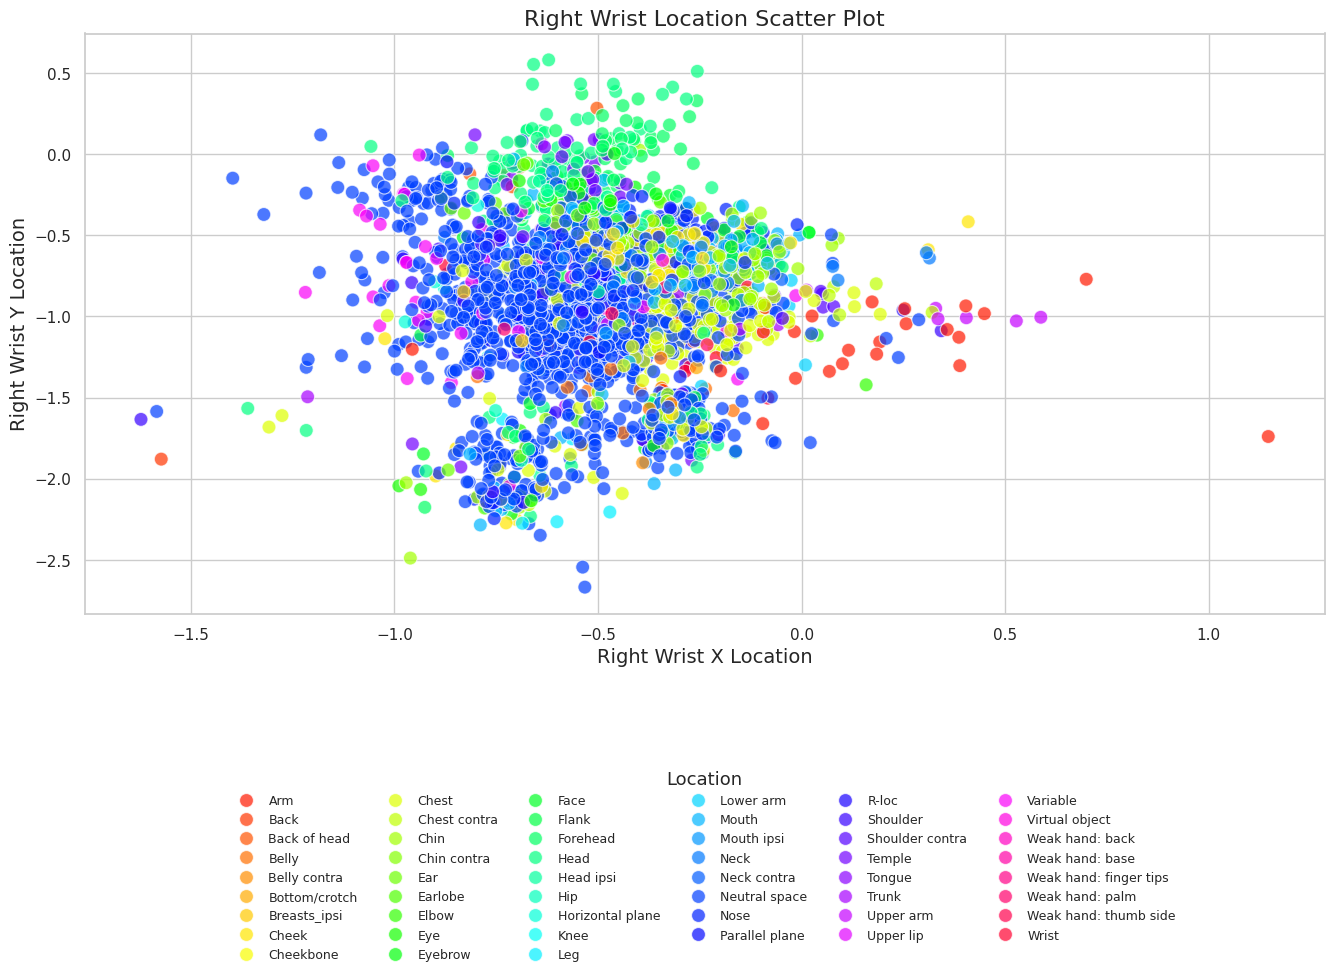

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_df is your merged DataFrame
# Ensure 'location' is treated as a categorical variable
merged_df['location'] = merged_df['Location'].astype('category')

# Optional: Drop rows with missing values in the relevant columns
merged_df = merged_df.dropna(subset=['right_x_mean', 'right_y_mean', 'location'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure with increased size for better legend placement
plt.figure(figsize=(16, 10))  # Increased width and height

# Create a scatter plot with Seaborn
scatter_plot = sns.scatterplot(
    data=merged_df,
    x='right_x_mean', 
    y='right_y_mean', 
    hue='location', 
    palette='hsv',  # 'hsv' is suitable for a large number of categories
    s=100,          # Size of the markers
    alpha=0.7       # Transparency of the markers
)

# Add title and labels
plt.title('Right Wrist Location Scatter Plot', fontsize=16)
plt.xlabel('Right Wrist X Location', fontsize=14)
plt.ylabel('Right Wrist Y Location', fontsize=14)

# Modify the legend to have multiple columns and place it below the plot
plt.legend(
    title='Location',
    title_fontsize='13',
    fontsize='9',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=6,
    frameon=False
)
'''
for idx, row in merged_df.iterrows():
    plt.annotate(
        row['Annotation ID Gloss: Dutch'],  # The annotation text
        (row['right_x_mean'], row['right_y_mean']),  # The point to annotate
        textcoords="offset points",  # How to position the text
        xytext=(5,5),  # Offset position (x, y) in points
        ha='left',  # Horizontal alignment
        fontsize=8,  # Font size of the annotation
        alpha=0.75  # Transparency of the annotation text
    )
'''

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin as needed

# Alternatively, use tight_layout with rect to leave space for the legend
# plt.tight_layout(rect=[0, 0.05, 1, 1])

# Show the plot
plt.show()


In [95]:
len(merged_df['Location'].unique())

51

In [102]:
labels = ['Arm', 'Belly', 'Nose']
merged_df = merged_df[merged_df['Location'].isin(labels)]